In [273]:
%matplotlib inline 
#Importations
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [198]:
#Variables
folder = "../../data_mrt/"
files = ['always_accept_1.csv','always_accept_2.csv','always_accept_3.csv','always_accept_4.csv',
        'always_reject_1.csv','always_reject_2.csv','always_reject_3.csv','always_reject_4.csv',]
data = []
times = []
experiment_stages = ['calibration','set_passthought','authenticate'] # This experiment had 3 stages,  
steps = [1,3,4] #Calibration has 1 step, set_passthought has 3 and auth has 4
passthougt_duration = 8 #passthought last 8 seconds


In [200]:
#Read data into pandas
for file in files:
    print("Appending file : ",file)
    filedata = pd.read_csv(folder+file)
    data.append(filedata)

Appending file :  always_accept_1.csv
Appending file :  always_accept_2.csv


//anaconda/envs/env/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (6,7,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Appending file :  always_accept_3.csv
Appending file :  always_accept_4.csv


//anaconda/envs/env/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2,3,4,5,6,7,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Appending file :  always_reject_1.csv
Appending file :  always_reject_2.csv
Appending file :  always_reject_3.csv
Appending file :  always_reject_4.csv


In [201]:
#Consider the data of only one person to make it easier
mydata = data[4]
mydata.head()

,time,task,v1,v2,v3,v4,v5,v6,v7,v8,...,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129
0,1515197871,/muse/acc,-42.96882,1007.8141,97.6564,1515197870,773345,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1515197871,/muse/eeg,838.94,787.94556,829.07007,815.9103,1515197870,794590,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1515197871,/muse/eeg/quantization,1,1,1,1,1515197870,794590,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1515197871,/muse/eeg,838.94,759.9809,807.68536,829.07007,1515197870,794593,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1515197871,/muse/eeg,838.94,769.8508,812.6203,834.005,1515197870,794593,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
mydata["task"].unique()

array([' /muse/acc', ' /muse/eeg', ' /muse/eeg/quantization',
       ' /muse/elements/alpha_relative', ' /muse/elements/beta_relative',
       ' /muse/elements/delta_relative', ' /muse/elements/gamma_relative',
       ' /muse/elements/theta_relative', ' /muse/elements/horseshoe',
       ' /muse/elements/is_good', ' /muse/elements/blink',
       ' /muse/elements/jaw_clench', ' /muse/elements/touching_forehead',
       ' /muse/elements/experimental/concentration',
       ' /muse/elements/experimental/mellow', ' /muse/elements/raw_fft0',
       ' /muse/elements/raw_fft1', ' /muse/elements/raw_fft2',
       ' /muse/elements/raw_fft3', ' /muse/elements/low_freqs_absolute',
       ' /muse/elements/alpha_absolute', ' /muse/elements/beta_absolute',
       ' /muse/elements/delta_absolute', ' /muse/elements/gamma_absolute',
       ' /muse/elements/theta_absolute',
       ' /muse/elements/alpha_session_score',
       ' /muse/elements/beta_session_score',
       ' /muse/elements/delta_session_scor

In [203]:
markers = [' /Marker/BLINK',
           ' /Marker/CalibrationComplete', 
           ' /Marker/ThinkPassthought',
           ' /Marker/BLANK',
           ' /Marker/YouhavesuccessfullysetyourPassthought',
           ' /Marker/ThinkPassthoughttoAunthenticate', 
           ' /Marker/Classifying',
           ' /Marker/AuthenticationSuccessful',
       ]
ffts = [' /muse/elements/raw_fft0',' /muse/elements/raw_fft1',
        ' /muse/elements/raw_fft2',' /muse/elements/raw_fft3']


my_dict = {}
for marker in markers:
    #extract the time when the marker was displayed
    time = mydata.loc[mydata["task"] == marker]['time']
    #Save marker and times 
    print(marker,list(time))
    my_dict[marker] = list(time)
    #times.append(list(time))



 /Marker/BLINK [1515197908]
 /Marker/CalibrationComplete [1515197918]
 /Marker/ThinkPassthought [1515197981, 1515197995, 1515198009]
 /Marker/BLANK [1515197921, 1515197991, 1515198005, 1515198022]
 /Marker/YouhavesuccessfullysetyourPassthought [1515198019]
 /Marker/ThinkPassthoughttoAunthenticate [1515198087, 1515198104, 1515198121, 1515198138]
 /Marker/Classifying [1515198095, 1515198112, 1515198129, 1515198146]
 /Marker/AuthenticationSuccessful []


In [204]:
#Remove the 1st and last blanks that are unnecessary
if len(my_dict[' /Marker/BLANK'])>2:
    my_dict[' /Marker/BLANK'] = my_dict[' /Marker/BLANK'][1:-1]

my_dict['set_passthought_marker'] = my_dict[' /Marker/BLANK'] + my_dict[' /Marker/YouhavesuccessfullysetyourPassthought']

for k,v in my_dict.items():
    print(k,v)

 /Marker/ThinkPassthought [1515197981, 1515197995, 1515198009]
 /Marker/CalibrationComplete [1515197918]
 /Marker/BLANK [1515197991, 1515198005]
 /Marker/AuthenticationSuccessful []
 /Marker/Classifying [1515198095, 1515198112, 1515198129, 1515198146]
 /Marker/ThinkPassthoughttoAunthenticate [1515198087, 1515198104, 1515198121, 1515198138]
set_passthought_marker [1515197991, 1515198005, 1515198019]
 /Marker/YouhavesuccessfullysetyourPassthought [1515198019]
 /Marker/BLINK [1515197908]


In [210]:
stages, step, start, end, raw_fft,fft_type =[],[],[],[],[],[]

def append_elements(stage,s,fft,start_time,end_time,f):
    stages.append(stage)
    step.append(s)
    raw_fft.append(fft)
    start.append(start_time)
    end.append(end_time)
    fft_type.append(f)
    
def filter_fft(start_time,end_time,f):
    filtered = mydata[(mydata["time"] >= start_time) & (mydata["time"] <= end_time)] #filter by time
    filtered_fft =filtered[filtered["task"]== f] #filter the relevant fft 
    fft= filtered_fft.iloc[:,2:131]#select the 129 fft columns from the 2nd one to the end
    return fft

In [211]:
#extract all the fft signals for each stage
for stage in experiment_stages:
    n_steps = steps[experiment_stages.index(stage)] #no of steps per stage
    for s in range(n_steps):
        for f in ffts:
            if stage == "calibration":
                start_time = my_dict[' /Marker/BLINK'][s]
                end_time   = my_dict[' /Marker/CalibrationComplete'][s]
                fft = filter_fft(start_time,end_time,f)
                append_elements(stage,s,fft,start_time,end_time,f)

            elif stage == "set_passthought":
                start_time = my_dict[' /Marker/ThinkPassthought'][s]
                end_time   = my_dict['set_passthought_marker'][s]
                fft = filter_fft(start_time,end_time,f)
                append_elements(stage,s,fft,start_time,end_time,f)
            elif stage == "authenticate":
                start_time = my_dict[' /Marker/ThinkPassthoughttoAunthenticate'][s]
                end_time   = my_dict[' /Marker/Classifying'][s]
                fft = filter_fft(start_time,end_time,f)
                append_elements(stage,s,fft,start_time,end_time,f)
            else:
                print('Error!!!')

In [212]:
d = {'stage': stages, 'step': step,
     'start':start ,'end':end,
     'fft_type':fft_type,'raw_fft':raw_fft}

df = pd.DataFrame(data=d, columns=['stage','step','fft_type','start','end','raw_fft'])
df.head()

,stage,step,fft_type,start,end,raw_fft
0,calibration,0,/muse/elements/raw_fft0,1515197908,1515197918,v1 v2 v3 ...
1,calibration,0,/muse/elements/raw_fft1,1515197908,1515197918,v1 v2 v3 ...
2,calibration,0,/muse/elements/raw_fft2,1515197908,1515197918,v1 v2 v3 ...
3,calibration,0,/muse/elements/raw_fft3,1515197908,1515197918,v1 v2 v3 ...
4,set_passthought,0,/muse/elements/raw_fft0,1515197981,1515197991,v1 v2 v3 ...


In [213]:
df['raw_fft'].shape
df.shape

(32, 6)

In [214]:
df['raw_fft'][0].head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129
20784,-0.6635884,3.8022594,3.100967,4.0471616,6.3241467,3.9675453,4.213265,2.295038,-1.4253997,-1.9559399,...,-21.172426,-18.115934,-20.009012,-20.920502,-16.778923,-16.427338,-19.952963,-19.492062,-21.069666,-25.957644
20838,-0.7476612,4.383258,4.451709,5.467604,6.9171014,5.5403366,5.319187,2.812797,0.2508929,-1.169809,...,-19.888943,-17.424732,-19.362255,-20.724451,-16.586504,-15.939710,-20.087960,-19.504688,-21.534720,-26.377220
20897,-0.86340404,4.5912366,5.4251337,6.3221064,7.121586,6.617387,6.109278,2.986761,1.4237756,-0.54128265,...,-18.662750,-17.064014,-18.888243,-20.952951,-16.682558,-15.548489,-20.398464,-19.571012,-22.010172,-25.907595
20952,-0.9846756,4.313806,6.047138,6.7002945,7.046152,7.3066225,6.639085,3.041748,2.168687,-0.24830152,...,-17.717257,-17.009598,-18.663803,-21.459618,-16.976328,-15.411303,-20.943344,-19.876322,-22.517118,-25.169598
21007,-0.8828584,3.8433728,6.3955417,6.7880387,6.8757215,7.7084947,7.046515,3.153943,2.5404942,-0.206778,...,-17.063390,-17.112888,-18.621310,-22.056492,-17.373800,-15.488744,-21.767277,-20.491070,-23.220970,-24.336226


In [216]:
df['raw_fft'][4].head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129
62026,-4.9037743,-1.4009837,4.803149,-0.7170354,-0.6874738,-3.821907,-10.296914,-6.798677,-3.2913427,-4.43971,...,-15.378425,-17.149712,-17.081106,-15.927362,-15.123798,-18.072435,-18.176031,-23.290092,-24.100039,-23.817730
62089,-8.597542,-0.55963796,4.5423217,-1.8673855,-0.4973006,-5.148309,-9.053609,-4.950892,-2.6290686,-4.0745373,...,-15.183224,-16.710188,-16.612572,-16.379913,-14.605850,-17.854586,-18.138735,-22.855446,-22.057695,-22.768670
62143,-10.978238,-0.15994792,4.5547156,-1.5463464,-0.21401358,-6.31901,-7.697152,-3.224236,-1.9331075,-3.8436985,...,-15.090225,-16.252934,-16.311040,-17.163517,-14.121168,-17.714449,-18.106487,-21.788424,-20.610165,-22.250448
62197,-10.3046,0.14601381,4.666023,-0.7700315,-0.18157999,-7.0355477,-6.610643,-1.939522,-1.2630202,-4.01651,...,-15.254861,-15.876205,-16.097137,-18.024876,-13.686461,-17.523220,-18.113081,-20.555365,-19.584208,-22.204493
62257,-10.514073,0.03643177,4.813371,-0.30452436,-0.40379125,-7.6406646,-5.773537,-1.181734,-0.70384264,-4.6708713,...,-15.799228,-15.639740,-15.981696,-18.564898,-13.369783,-17.225498,-18.115774,-19.726704,-18.830536,-22.246460


In [265]:
df['raw_fft'].shape

(32,)

### Cosine Similarity

In [333]:
#Choose variables: 
fft_type = ' /muse/elements/raw_fft1'
stage = 'authenticate'
step1= 0
step2= 1

#Function that computes and plots the cosine similarity between 2 groups
def compare(stage,fft_type, step1, step2):
    #Select the two comparison groups
    group1 = (df[(df['stage']==stage) &(df['fft_type'] == fft_type) &(df['step'] == step1)])
    group2 = (df[(df['stage']==stage) &(df['fft_type'] == fft_type) &(df['step'] == step2)]) 
    #select the fft values that are at index 0,5 of each group
    X = group1.iloc[0,5]
    Y = group2.iloc[0,5]
    #Compute cosine similarity
    cos = cosine_similarity(X,Y)
    chart_title = 'Steps '+ str(step1) +" and "+str(step2)+' of Stage: '+str(stage)
    plt.title(chart_title)
    plt.imshow(cos); #Plot
    plt.colorbar()
    plt.show()

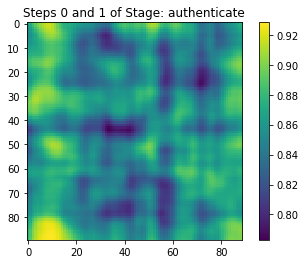

In [334]:
compare(stage,fft_type, step1, step2)

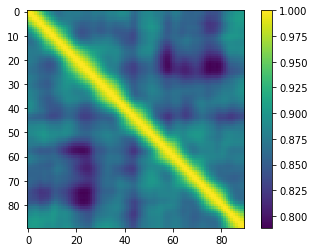

In [322]:
compare("authenticate",' /muse/elements/raw_fft1', 0, 0)

In [345]:
def compare2(stage,fft_type, step1, step2):
    #Select the two comparison groups
    group1 = (df[(df['stage']==stage) &(df['fft_type'] == fft_type) &(df['step'] == step1)])
    group2 = (df[(df['stage']==stage) &(df['fft_type'] == fft_type) &(df['step'] == step2)]) 
    #select the fft values that are at index 0,5 of each group
    X = group1.iloc[0,5]
    Y = group2.iloc[0,5]
    #Compute cosine similarity
    cos = cosine_similarity(X,Y)
    return cos    


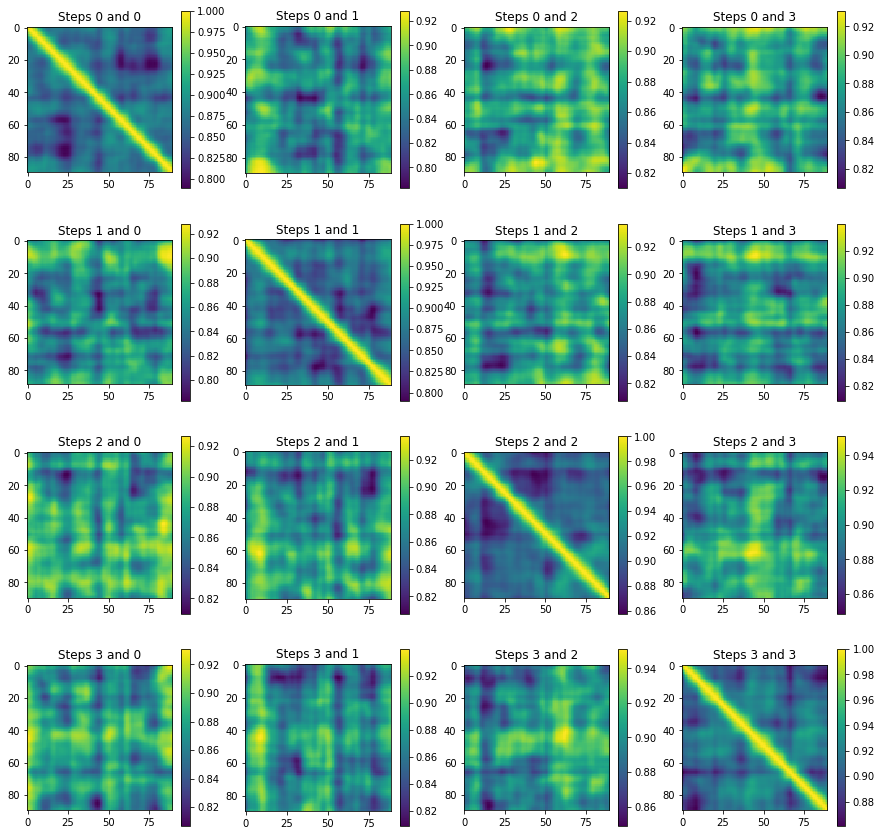

In [361]:
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(15,15,))
for i in range(4):
    for j in range(4):
        cos = compare2(stage,fft_type, i, j)
        s = axes[i,j].imshow(cos)
        axes[i,j].set_title('Steps '+ str(i) +" and "+str(j))
        #axes[i,j].colorbar()
        fig.colorbar(s,ax=axes[i,j])